### Chanel Maps code

General to two cubes with similar velocity axis, define a range of velocity to obtain differents maps

In [1]:
import numpy as np
from matplotlib import patches as mpatches
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.wcs import WCS
from astropy import constants as const
from spectral_cube import SpectralCube
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel


#### --------------------------- Parameters to change -----------------------------

In [2]:

# Define the filenames of the two data cubes

file2 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/CODES/TEST/moments_cube1_nchan3.fits'  # Replace with the actual filename of the first cube (this case, first cube is original cube with the VRAD transformed)
file1 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/CODES/TEST/moments_cube2_nchan3.fits'   #cube is the cube with the spectral resolution changed)


# Open the FITS files
cube1 = SpectralCube.read(file1)
cube2 = SpectralCube.read(file2)

print(repr(cube1.header))
print(repr(cube2.header))

# Select the region to generate channel maps
# Define the center coordinates of the region to mask
coord = SkyCoord("05h39m36.675s", "-69d46m00.260s", frame='icrs')

# Define the size of the region to mask (in arcseconds)
width = 90 * u.arcsec
height = 110 * u.arcsec  # Width and height in arcseconds

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3                                                  
NAXIS1  =                   70                                                  
NAXIS2  =                   60                                                  
NAXIS3  =                   10                                                  
BMAJ    = 0.004444444444444444                                                  
BMIN    = 0.004444444444444444                                                  
BPA     =                  0.0                                                  
BTYPE   = 'Intensity'                                                           
OBJECT  = 'N159-13CII'                                                          
BUNIT   = 'K km s-1'           / Brightness unit in Jy/beam                     
ALTRVAL =   5.990705566226E+

#### ------------------------ Obtain the essential information -------------------------

In [3]:
wcs1 = cube1.wcs.celestial
wcs2 = cube2.wcs.celestial

print('WCS1:', wcs1)
print('WCS2:', wcs2)

WCS1: WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 84.909230273958 -69.760160218056 
CRPIX : 43.505224439404 32.760800801165 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.00148148147855 0.00148148147855 
NAXIS : 70  60
WCS2: WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 84.909230273958 -69.760160218056 
CRPIX : 43.505224439404 32.760800801165 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.00148148147855 0.00148148147855 
NAXIS : 70  60


In [4]:
# Obtain the essential information from the cubes
#UNIT1 = cube1.header['CUNIT3']
#CRVAL1 = cube1.header['VELO-LSR'] * u.m/u.s # Value of the third axis
#CRPIX1 = cube1.header['CRPIX3']  # Reference pixel of the third axis
#CDELT1 = cube1.header['DELTAV'] * u.m/u.s # Coordinate increment at reference point

UNIT1 = cube1.header['CUNIT3']
CRVAL1 = cube1.header['CRVAL3'] * u.km/u.s # Value of the third axis
CRPIX1 = cube1.header['CRPIX3']  # Reference pixel of the third axis
CDELT1 = cube1.header['CDELT3'] * u.km/u.s # Coordinate increment at reference point

print('UNIT:', UNIT1)
print('CRVAL:', CRVAL1)
print('CRPIX:', CRPIX1)
print('CRDELT:', CDELT1)

print('--------------------')
UNIT2 = cube2.header['CUNIT3']
RESTFRQ2 = cube2.header['RESTFRQ'] * u.Hz  # Rest frequency in Hz
CRVAL2 = cube2.header['CRVAL3'] * u.km/u.s # Value of the third axis
CRPIX2 = cube2.header['CRPIX3']  # Reference pixel of the third axis
CDELT2 = cube2.header['CDELT3'] * u.km/u.s # Coordinate increment at reference point

print('UNIT in cube 2:', UNIT2)
print('RESTFRQ in cube 2:', RESTFRQ2)
print('CRVAL in cube 2:', CRVAL2)
print('CRPIX in cube 2:', CRPIX2)
print('CRDELT in cube 2:', CDELT2)

UNIT: km s-1
CRVAL: 220.99999999997 km / s
CRPIX: 1.0
CRDELT: 3.0 km / s
--------------------
UNIT in cube 2: km s-1
RESTFRQ in cube 2: 0.0 Hz
CRVAL in cube 2: 221.0 km / s
CRPIX in cube 2: 1.0
CRDELT in cube 2: 3.0 km / s


In [5]:
## Necesitamos la velocidad de la luz para la aplicación de la fórmula Doppler
C = const.c.to(u.km / u.s).value * u.km/u.s  # Velocidad de la luz en km/s
print('\nVelocidad de la luz (C):', C)


# Crear los ejes de frecuencia (aunque no se usarán directamente para el enmascaramiento por velocidad)
#FREQ = cube2.with_spectral_unit(u.Hz, rest_value=RESTFRQ2).spectral_axis.to(u.GHz)
#print(FREQ)



Velocidad de la luz (C): 299792.458 km / s


In [6]:
#VEL_LSR = CRVAL1.to(u.km/u.s) 
#CDEL1 = CDELT1.to(u.km/u.s)
#print('Reference VEL in KM/S:', VEL_LSR)
#print('CRDELT in KM/S:', CDEL1)

#RESTFRQ2 = RESTFRQ2.to(u.GHz)  # Convert to GHz
#print('RESTFRQ2 in GHz:', RESTFRQ2)

#### -------------------------------- Generate  the spectral axis ------------------------------

In [6]:
# Check the number of channels in the cubes
nchan1 = cube1.shape[0]
nchan2 = cube2.shape[0]


print('Number of channels in cube:', nchan1)
print('Number of channels in cube2:', nchan2)

Number of channels in cube: 10
Number of channels in cube2: 10


In [7]:
# Obtain the velocity axis and frequency axis
index1 = np.arange(1, nchan1 + 1 ) # Aggregate (+1) because nchan2 print 1 to 728
#VEL1 = VEL_LSR + (index1 - CRPIX1) * CDEL1 #Create the velocity axis
VEL1 = CRVAL1 + (index1 - CRPIX1) * CDELT1

index2 = np.arange(1, nchan2 + 1 ) # Aggregate (+1) because nchan2 print 1 to 728
VEL2 = CRVAL2 + (index2 - CRPIX2) * CDELT2 #Create the velocity axis

print('Index:', index1)
print('Velocity:', VEL1)
print('---------------------')
print('Index:', index2)
print('Velocity:', VEL2)


Index: [ 1  2  3  4  5  6  7  8  9 10]
Velocity: [221. 224. 227. 230. 233. 236. 239. 242. 245. 248.] km / s
---------------------
Index: [ 1  2  3  4  5  6  7  8  9 10]
Velocity: [221. 224. 227. 230. 233. 236. 239. 242. 245. 248.] km / s


### ------------------- Define the range of velocities to geneerate nine channel maps ------------------------------

In [8]:
# --------- Define a range velocity
Vel = np.arange(224, 260, CDELT1.value) *u.km/u.s

# --- Find the closest channel indices for each target velocity ---
# For cube2 (intensity)
channel_indices2 = np.array([np.argmin(np.abs(VEL2 - v)) for v in Vel])
# For cube1 (contours)
channel_indices1 = np.array([np.argmin(np.abs(VEL1 - v)) for v in Vel])

# It's good practice to verify that the found velocities are close to target
print("\n--- Selected Channels ---")
print(f"Target Velocities (km/s): {Vel.value}")
print(f"Cube 2 Actual Velocities: {VEL2[channel_indices2].value}")
print(f"Cube 1 Actual Velocities: {VEL1[channel_indices1].value}")

# Max and min values of intensity
print('------------')
print(cube1.max())
print(cube1.min())

print('---------------')
print(cube2.min())
print(cube2.max())


--- Selected Channels ---
Target Velocities (km/s): [224. 227. 230. 233. 236. 239. 242. 245. 248. 251. 254. 257.]
Cube 2 Actual Velocities: [224. 227. 230. 233. 236. 239. 242. 245. 248. 248. 248. 248.]
Cube 1 Actual Velocities: [224. 227. 230. 233. 236. 239. 242. 245. 248. 248. 248. 248.]
------------
0.0652895027945652 K km / s
-0.05907424400429459 K km / s
---------------
-4.005142178238804 K km / s
44.421968807454654 K km / s


In [9]:
# --- Contour Level Definition Options ---

# Set this to True to use custom min/max/scale contour definition,
# or False to use RMS noise estimation.
use_custom_contours = True

if use_custom_contours:
    # --- Custom Contour Definition Parameters ---
    # Define the minimum and maximum values for your contours.
    # These values should be in the same units as your cube1 data.
    min_contour_value = 3*1.519e-3 *u.Unit(cube1.unit)   # Example: Adjust this based on your data's intensity range
    max_contour_value = cube1.max().value * u.Unit(cube1.unit)   # Example: Adjust this based on your data's intensity range

    # Define the number of contour levels you want.
    num_contour_levels = 10

    # Define the type of spacing for your contour levels:
    contour_scale_type = 'linear' # Options: 'linear', 'logarithmic', 'quadratic', 'squared'

    print(f"\nUsing custom contour definition with '{contour_scale_type}' scaling.")
    print(f"Min contour value: {min_contour_value:.4e}")
    print(f"Max contour value: {max_contour_value:.4e}")
    print(f"Number of levels: {num_contour_levels}")

    if contour_scale_type == 'linear':
        contour_levels = np.linspace(min_contour_value.value, max_contour_value.value, num_contour_levels) * u.Unit(cube1.unit)
    elif contour_scale_type == 'logarithmic':
        if min_contour_value.value <= 0:
            print("Warning: Cannot use logarithmic scale with non-positive min_contour_value. Falling back to linear.")
            contour_levels = np.linspace(min_contour_value.value, max_contour_value.value, num_contour_levels) * u.Unit(cube1.unit)
        else:
            contour_levels = np.logspace(np.log10(min_contour_value.value), np.log10(max_contour_value.value), num_contour_levels) * u.Unit(cube1.unit)
    elif contour_scale_type == 'quadratic':
        # Simple quadratic spacing: levels are spaced quadratically between min and max
        # You might need to adjust the function based on your specific needs
        x = np.linspace(0, 1, num_contour_levels)
        quad_scaled_values = min_contour_value.value + (max_contour_value.value - min_contour_value.value) * x**2
        contour_levels = quad_scaled_values * u.Unit(cube1.unit)
    elif contour_scale_type == 'squared':
        # Crecimiento abrupto hacia el final (valores más grandes más espaciados)
        x = np.linspace(0, 1, num_contour_levels)
        squared_scaled_values = min_contour_value.value + (max_contour_value.value - min_contour_value.value) * (1 - (1 - x)**2)
        contour_levels = squared_scaled_values * u.Unit(cube1.unit)
    else:
        print("Warning: Invalid 'contour_scale_type'. Falling back to linear spacing.")
        contour_levels = np.linspace(min_contour_value.value, max_contour_value.value, num_contour_levels) * u.Unit(cube1.unit)

print("Contour levels:", contour_levels)


Using custom contour definition with 'linear' scaling.
Min contour value: 4.5570e-03 K km / s
Max contour value: 6.5290e-02 K km / s
Number of levels: 10
Contour levels: [0.004557   0.01130506 0.01805311 0.02480117 0.03154922 0.03829728
 0.04504534 0.05179339 0.05854145 0.0652895 ] K km / s


Number of iterations (channels to plot): 12
(60, 70)
(60, 70)
(60, 70)
(60, 70)
(60, 70)
(60, 70)
(60, 70)
(60, 70)
(60, 70)


C:\Users\macka\AppData\Local\Temp\ipykernel_24692\1940473583.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 0.96])


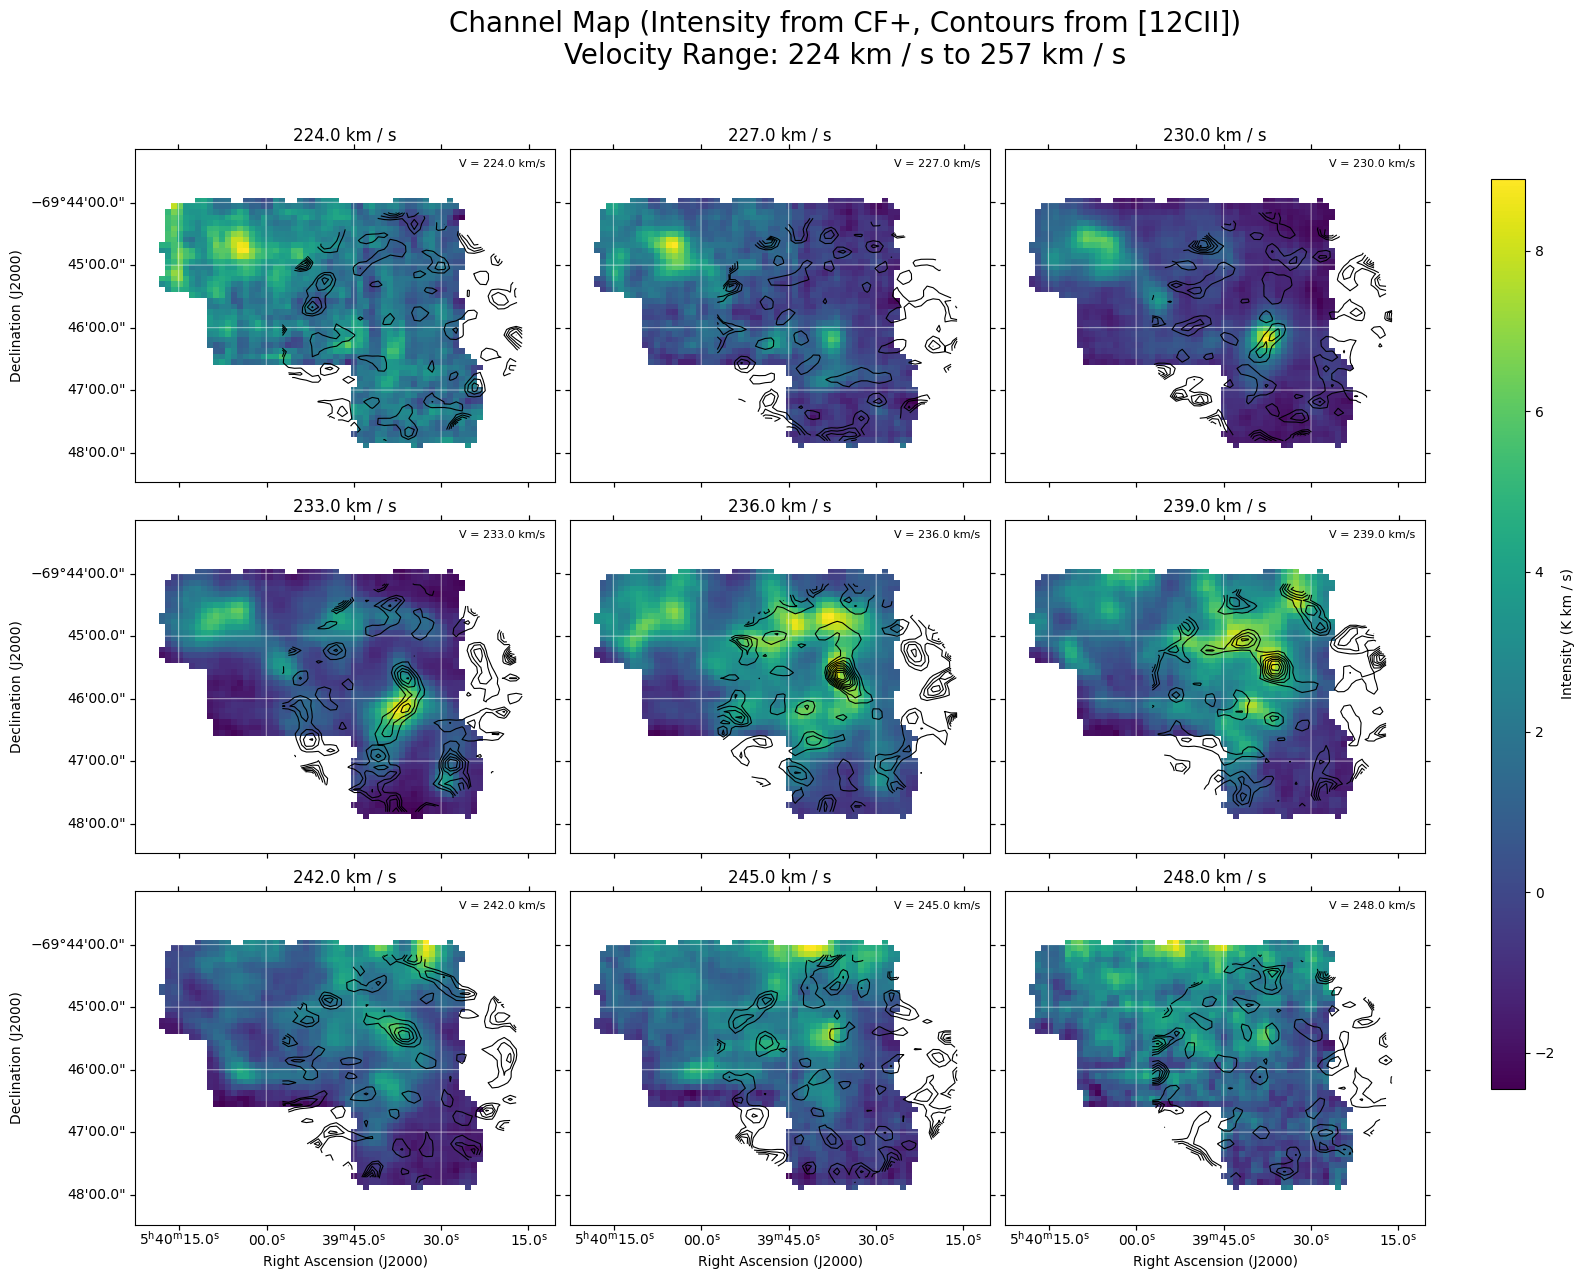

In [10]:
# Generate the channel maps with the original cube of yoko
num_iteraciones = len(Vel)
print('Number of iterations (channels to plot):', num_iteraciones)
# --- Set up the plot figure ---
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17, 13), # Define the number of rows and column
                         subplot_kw={'projection': cube2.wcs.celestial}, )

fig.suptitle(f'Channel Map (Intensity from CF+, Contours from [12CII])\nVelocity Range: {Vel[0]:.0f} to {Vel[-1]:.0f}', fontsize=20)

axes = axes.ravel() # Flatten the axes array for easy iteration

# --- Plotting loop ---
for i, (idx1, idx2, vel_target) in enumerate(list(zip(channel_indices1, channel_indices2, Vel))[:9]):
    ax = axes[i]

    # Get the 2D slice for the current channel.
    slice_cube2 = cube2[idx2] # SpectralCube slice, retains WCS
    slice_cube1 = cube1[idx1] # SpectralCube slice, retains WCS
    print(slice_cube1.shape)
    # Get the 2D celestial WCS object for each slice
    wcs_2d_cube2 = slice_cube2.wcs.celestial
    wcs_2d_cube1 = slice_cube1.wcs.celestial

    # --- Plot Intensity from Cube 2 ---
    im = ax.imshow(slice_cube2.value, origin='lower', cmap='viridis', aspect='auto',
                    transform=ax.get_transform(wcs_2d_cube2))
    
    colores = ["#1105b4ff", "#3b0681ff", "#e30eff", "#ff0000", "#ffa42e", "#fffb19", "#c8ff00ff","#53ff31", "#00f0c8", "#ff9ed7"]
    # --- Overlay Contours from Cube 1 ---
    ax.contour(slice_cube1.value, levels=contour_levels.value, colors='black' , linewidths=0.8,
                transform=ax.get_transform(wcs_2d_cube1))

    # --- Customize each subplot ---
    ax.set_title(f'{VEL2[idx2]:.1f}', fontsize=12)

    ra = ax.coords[0]
    dec = ax.coords[1]

    ra.set_major_formatter('hh:mm:ss.s')
    dec.set_major_formatter('dd:mm:ss.s')

    ax.coords.grid(True, color='white', ls='solid', alpha=0.5)

    if i % 3 != 0:
        dec.set_ticklabel_visible(False)
        dec.set_axislabel('')
    else:
        dec.set_axislabel("Declination (J2000)", fontsize=10)

    if i < 6:
        ra.set_ticklabel_visible(False)
        ra.set_axislabel('')
    else:
        ra.set_axislabel("Right Ascension (J2000)", fontsize=10)

    # --- Custom Legend for Frame Number ---
    custom_legend_patch = mpatches.Patch(color='none', label=f"V = {VEL2[idx2].value:.1f} km/s")
    ax.legend(handles=[custom_legend_patch], loc='upper right', fontsize=8, frameon=False, handletextpad=0)

# --- Add a single colorbar for the intensity ---
fig.subplots_adjust(right=0.85, wspace=0.1, hspace=0.1)
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax, label=f'Intensity ({cube2.unit})')

# --- Adjust layout and show plot ---
plt.tight_layout(rect=[0, 0, 0.85, 0.96])
plt.show()

In [ ]:
# Create a color base 
from matplotlib.colors import LinearSegmentedColormap

def combinar_colormaps(cmap1, cmap2, frac1):
    """
    Combina dos colormaps. `frac1` es la fracción del cmap1.
    """
    n1 = int(256 * frac1)
    n2 = 256 - n1

    newcolors = np.vstack((
        plt.get_cmap(cmap1)(np.linspace(0, 1, n1)),
        plt.get_cmap(cmap2)(np.linspace(0, 1, n2))
    ))
    return LinearSegmentedColormap.from_list('combined_cmap', newcolors)

# Crear cmap personalizado: 80% escala de grises, 20% plasma
cmap_custom = combinar_colormaps('Greys', 'Reds_r', frac1=0.65)


(60, 70)
(60, 70)
(60, 70)
(60, 70)
(60, 70)
(60, 70)
(60, 70)
(60, 70)


C:\Users\macka\AppData\Local\Temp\ipykernel_16244\3373087869.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 0.96])


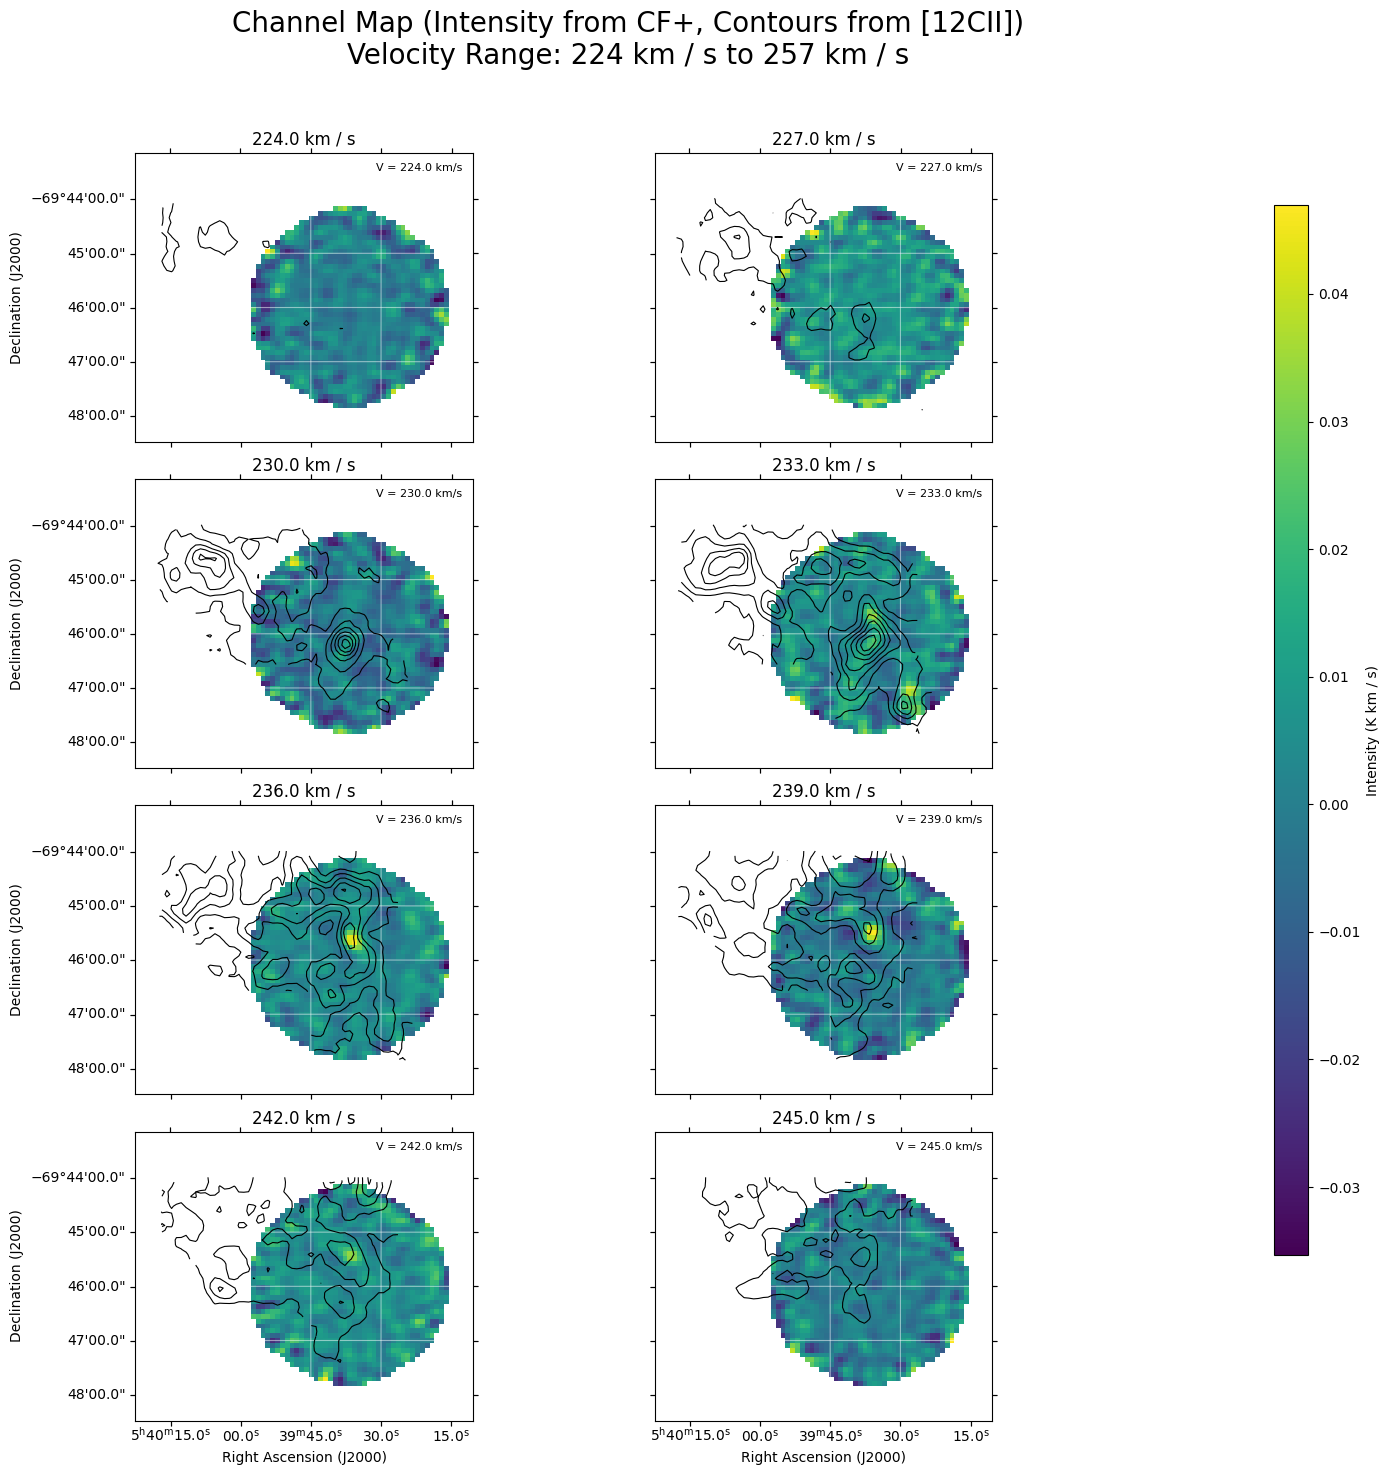

In [ ]:
# Generate the channel maps with the original cube of yoko
# --- Set up the plot figure ---
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(17, 15), # Define the number of rows and column
                         subplot_kw={'projection': cube2.wcs.celestial}, )

fig.suptitle(f'Channel Map (Intensity from CF+, Contours from [12CII])\nVelocity Range: {Vel[0]:.0f} to {Vel[-1]:.0f}', fontsize=20)
#ax.text(0.5, 0.92, r'Intensity from CF$^+$ (color scale) and Contours from [12CII]')
axes = axes.ravel() # Flatten the axes array for easy iteration

# --- Plotting loop ---
for i, (idx1, idx2, vel_target) in enumerate(list(zip(channel_indices1, channel_indices2, Vel))[:8]):
    ax = axes[i]

    # Get the 2D slice for the current channel.
    slice_cube2 = cube2[idx2] # SpectralCube slice, retains WCS
    slice_cube1 = cube1[idx1] # SpectralCube slice, retains WCS
    print(slice_cube1.shape)
    # Get the 2D celestial WCS object for each slice
    wcs_2d_cube2 = slice_cube2.wcs.celestial
    wcs_2d_cube1 = slice_cube1.wcs.celestial

    # --- Plot Intensity from Cube 2 ---
    im = ax.imshow(slice_cube2.value, origin='lower', cmap='viridis', aspect='equal', alpha=1.0,
                   )
    
    contour_data = slice_cube1.value
    cleaned_contour_data = np.nan_to_num(contour_data, nan=0.0)
    colores = ["#1105b4ff", "#3b0681ff", "#e30eff", "#ff0000", "#ffa42e", "#fffb19", "#c8ff00ff","#53ff31", "#00f0c8", "#ff9ed7"]
    # --- Overlay Contours from Cube 1 ---
    ax.contour(slice_cube1.value, levels=contour_levels.value,
              colors='black', 
              #cmap='rainbow', 
              linewidths=0.8, alpha=1
               )

    # --- Customize each subplot ---
    ax.set_title(f'{VEL2[idx2]:.1f}', fontsize=12)

    ra = ax.coords[0]
    dec = ax.coords[1]

    ra.set_major_formatter('hh:mm:ss.s')
    dec.set_major_formatter('dd:mm:ss.s')

    ax.coords.grid(True, color='white', ls='solid', alpha=0.5)

    if i % 2 != 0:
        dec.set_ticklabel_visible(False)
        dec.set_axislabel('')
    else:
        dec.set_axislabel("Declination (J2000)", fontsize=10)

    if i < 6:
        ra.set_ticklabel_visible(False)
        ra.set_axislabel('')
    else:
        ra.set_axislabel("Right Ascension (J2000)", fontsize=10)

    # --- Custom Legend for Frame Number ---
    custom_legend_patch = mpatches.Patch(color='none', label=f"V = {VEL2[idx2].value:.1f} km/s")
    ax.legend(handles=[custom_legend_patch], loc='upper right', fontsize=8, frameon=False, handletextpad=0)

# --- Add a single colorbar for the intensity ---
fig.subplots_adjust(right=0.85, wspace=0.1, hspace=0.1)
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax, label=f'Intensity ({cube2.unit})')

# --- Adjust layout and show plot ---
plt.tight_layout(rect=[0, 0, 0.85, 0.96])
plt.show()

### ----------------------------- Select the specifict region in plot -------------------------------

In [13]:
# Convert celestial coordinates to pixel coordinates for the region of interest
center_x_pix, center_y_pix = skycoord_to_pixel(coord, wcs2, origin=0)

# Convert the width and height from arcsec to pixels
pixel_scale_x = abs(wcs1.pixel_scale_matrix[0, 0] * u.deg).to(u.arcsec)
pixel_scale_y = abs(wcs1.pixel_scale_matrix[1, 1] * u.deg).to(u.arcsec)
width_pix = width.to(u.arcsec).value / pixel_scale_x.value
height_pix = height.to(u.arcsec).value / pixel_scale_y.value

# Calculate the pixel limits for the zoom
xmin_pix = center_x_pix - width_pix / 2
xmax_pix = center_x_pix + width_pix / 2
ymin_pix = center_y_pix - height_pix / 2
ymax_pix = center_y_pix + height_pix / 2

In [14]:
# corregir esto
rect_x = [xmin_pix, xmax_pix, xmax_pix, xmin_pix, xmin_pix]
rect_y = [ymin_pix, ymin_pix, ymax_pix, ymax_pix, ymin_pix]

In [ ]:
import patch

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17, 13), # Define the number of rows and column
                         subplot_kw={'projection': cube2.wcs.celestial}, )

fig.suptitle(f'Channel Map (Intensity from CF+, Contours from [12CII])\nVelocity Range: {Vel[0]:.0f} to {Vel[-1]:.0f}', fontsize=20)
axes = axes.ravel() # Flatten the axes array for easy iteration

# --- Plotting loop ---
for i, (idx1, idx2, vel_target) in enumerate(zip(channel_indices1, channel_indices2, Vel)):
    ax = axes[i]

    # Get the 2D slice for the current channel.
    slice_cube2 = cube2[idx2] # SpectralCube slice, retains WCS
    slice_cube1 = cube1[idx1] # SpectralCube slice, retains WCS
    print(slice_cube1.shape)
    # Get the 2D celestial WCS object for each slice
    wcs_2d_cube2 = slice_cube2.wcs.celestial
    wcs_2d_cube1 = slice_cube1.wcs.celestial

    # --- Plot Intensity from Cube 2 ---
    im = ax.imshow(slice_cube2.value, origin='lower', cmap='viridis', aspect='equal', alpha=1.0)
    
    contour_data = slice_cube1.value
    cleaned_contour_data = np.nan_to_num(contour_data, nan=0.0)
    colores = ["#1105b4ff", "#3b0681ff", "#e30eff", "#ff0000", "#ffa42e", "#fffb19", "#c8ff00ff","#53ff31", "#00f0c8", "#ff9ed7"]
    # --- Overlay Contours from Cube 1 ---
    ax.contour(slice_cube1.value, levels=contour_levels.value,
              colors='black', 
              linewidths=0.8, alpha=1)

    # --- Añadir la región de interés (el recuadro) ---
    rect = mpatches.Rectangle((rect_x, rect_y), width_pix, height_pix, 
                             edgecolor='red', facecolor='none', linewidth=2, linestyle='--')
    ax.add_patch(rect)
    
    # --- Customize each subplot ---
    ax.set_title(f'{VEL2[idx2]:.1f}', fontsize=12)

    ra = ax.coords[0]
    dec = ax.coords[1]

    ra.set_major_formatter('hh:mm:ss.s')
    dec.set_major_formatter('dd:mm:ss.s')

    ax.coords.grid(True, color='white', ls='solid', alpha=0.5)

    if i % 3 != 0:
        dec.set_ticklabel_visible(False)
        dec.set_axislabel('')
    else:
        dec.set_axislabel("Declination (J2000)", fontsize=10)

    if i < 6:
        ra.set_ticklabel_visible(False)
        ra.set_axislabel('')
    else:
        ra.set_axislabel("Right Ascension (J2000)", fontsize=10)

    # --- Custom Legend for Frame Number ---
    custom_legend_patch = mpatches.Patch(color='none', label=f"V = {VEL2[idx2].value:.1f} km/s")
    ax.legend(handles=[custom_legend_patch], loc='upper right', fontsize=8, frameon=False, handletextpad=0)

# --- Add a single colorbar for the intensity ---
fig.subplots_adjust(right=0.85, wspace=0.1, hspace=0.1)
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax, label=f'Intensity ({cube2.unit})')

# --- Adjust layout and show plot ---
plt.tight_layout(rect=[0, 0, 0.85, 0.96])
plt.show()

ModuleNotFoundError: No module named 'patch'

(60, 70)


C:\Users\macka\AppData\Local\Temp\ipykernel_24692\2497530015.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('rainbow')


(60, 70)


C:\Users\macka\AppData\Local\Temp\ipykernel_24692\2497530015.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('rainbow')


(60, 70)


C:\Users\macka\AppData\Local\Temp\ipykernel_24692\2497530015.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('rainbow')


(60, 70)


C:\Users\macka\AppData\Local\Temp\ipykernel_24692\2497530015.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('rainbow')


(60, 70)


C:\Users\macka\AppData\Local\Temp\ipykernel_24692\2497530015.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('rainbow')


(60, 70)


C:\Users\macka\AppData\Local\Temp\ipykernel_24692\2497530015.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('rainbow')


(60, 70)


C:\Users\macka\AppData\Local\Temp\ipykernel_24692\2497530015.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('rainbow')


(60, 70)


C:\Users\macka\AppData\Local\Temp\ipykernel_24692\2497530015.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('rainbow')


(60, 70)


C:\Users\macka\AppData\Local\Temp\ipykernel_24692\2497530015.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('rainbow')


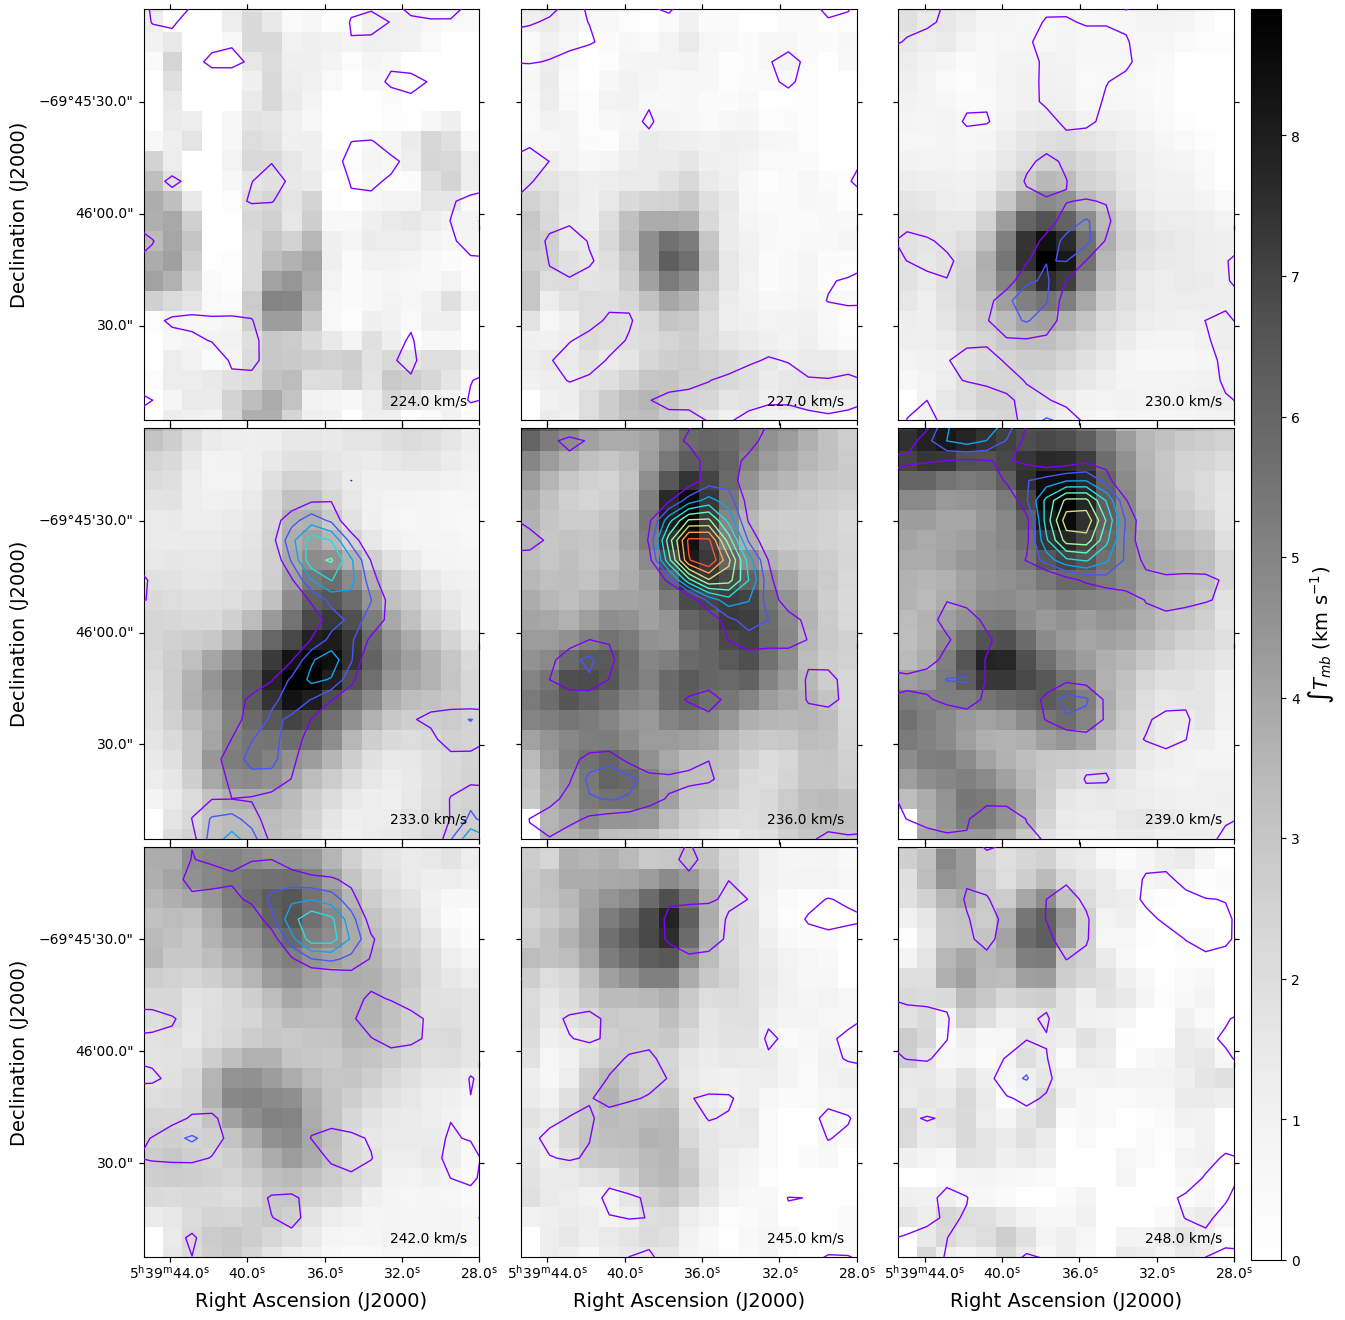

In [44]:
import matplotlib.cm as cm
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 13), # Define the number of rows and column
                         subplot_kw={'projection': cube1.wcs.celestial}, )

#fig.suptitle(r'Channel Map (Greys color base from CF$^+$, Contours from C$^+$)', fontsize=20)
axes = axes.ravel() # Flatten the axes array for easy iteration


# --- Plotting loop ---
for i, (idx1, idx2, vel_target) in enumerate(list(zip(channel_indices1, channel_indices2, Vel))[:9]):
    ax = axes[i]

    # Get the 2D slice for the current channel.
    slice_cube2 = cube1[idx1]
    slice_cube1 = cube2[idx2]
    print(slice_cube1.shape)
    # Get the 2D celestial WCS object for each slice
    wcs_2d_cube2 = slice_cube2.wcs.celestial
    wcs_2d_cube1 = slice_cube1.wcs.celestial

    # --- Plot Intensity from Cube 2 ---
    im = ax.imshow(slice_cube1.value, origin='lower', cmap='Greys', aspect='equal', alpha=1, vmin=0)

    contour_data = slice_cube2.value
    cleaned_contour_data = np.nan_to_num(contour_data, nan=0.0)
    # Crea un colormap tipo rainbow
    cmap = cm.get_cmap('rainbow')

# Genera una lista de colores automáticamente según el número de niveles
    colors = cmap(np.linspace(0, 1, len(contour_levels)))
        # --- Overlay Contours from Cube 1 ---
    ax.contour(slice_cube2.value, levels=contour_levels.value,
               colors=colors,
               linewidths=1, alpha=1)

#----------------panel ocn informacion de los contornos --------------------
    #if i == 0:
    # Calcula el delta entre niveles
    #    delta_contour = (max_contour_value.value - min_contour_value.value) / (num_contour_levels - 1)

    # Prepara el texto informativo
    #    contour_info_text = (
    #    f"Contours:\n"
    #    f"min = {min_contour_value.value:.3e} {cube1.unit}\n"
    #    f"Δ = {delta_contour:.2e} {cube1.unit}\n"
    #    f"N = {num_contour_levels}"
    #    )

    # Lo agregas en la esquina superior izquierda del primer canal
    #    ax.text(
    #        0.05, 0.95,                   # posición relativa (x,y) dentro del panel
    #        contour_info_text,            # texto a mostrar
    #        transform=ax.transAxes,       # sistema de referencia relativo al eje
    #        fontsize=10,
    #        color='white',                # texto blanco sobre fondo gris
    #        ha='left', va='top',
    #        bbox=dict(facecolor='black', alpha=0.4, edgecolor='none', boxstyle='round,pad=0.3')
    #    )

    # --- Remove the rectangle and set plot limits for zoom ---
    # The following two lines are deleted:
    # rect = mpatches.Rectangle((rect_x, rect_y), width_pix, height_pix, edgecolor='red', facecolor='none', linewidth=2, linestyle='--')
    # ax.add_patch(rect)
    
    # These two lines are added to set the x and y limits
    ax.set_xlim(xmin_pix, xmax_pix)
    ax.set_ylim(ymin_pix, ymax_pix)

    # --- Customize each subplot ---
    #ax.set_title(f'{VEL2[idx2]:.1f}', fontsize=12)

    ra = ax.coords[0]
    dec = ax.coords[1]

    ra.set_major_formatter('hh:mm:ss.s')
    dec.set_major_formatter('dd:mm:ss.s')

    ax.coords.grid(False, color='white', ls='solid', alpha=0.5)

    if i % 3 != 0:
        dec.set_ticklabel_visible(False)
        dec.set_axislabel("")
    else:
        dec.set_axislabel("Declination (J2000)", fontsize=14)

    if i < 6:
        ra.set_ticklabel_visible(False)
        ra.set_axislabel("")
    else:
        ra.set_axislabel("Right Ascension (J2000)", fontsize=14)

    # --- Custom Legend for Frame Number ---
    custom_legend_patch = mpatches.Patch(color='none', label=f"{VEL2[idx2].value:.1f} km/s", )
    ax.legend(handles=[custom_legend_patch], loc='lower right', fontsize=10, frameon=False, handletextpad=0)
    # Dentro del bucle for, después de definir ax:
    ax.tick_params(axis='both', which='major', labelsize=10)

# --- Add a single colorbar for the intensity ---
fig.subplots_adjust(left=0.1, right=0.85, top=0.98, bottom=0.02, wspace=0.02, hspace=0.02)
cbar_ax = fig.add_axes([0.85, 0.018, 0.02, 0.962]) # [x, y, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r'$\int T_{mb}$ (km s$^{-1}$)', fontsize=14)  # label más grande y separado
#cbar.ax.tick_params(labelsize=12)  # agranda los números (ticks) de la barra


# --- Adjust layout and show plot ---
#plt.tight_layout(rect=[0, 0, 0, 1.0])
plt.show()
